This is a pipeline towards making habitat models for the Tricolored Blackbird and Burrowing Owl, two of my dissertion research topics.  Developing habitat models will provide data for landscape genetic analyses and potentially facilitate field efforts in identifying sample sites.  This is a several step process starting with the parsing of large, complex, and data-rich files.  

In [18]:
#This code takes in a file downloaded from ebird.  Data are behind a sign-in wall and hence are not
#available through wget or curl.  This code reads in the data and creates output that can be used
#for analyses downstream.  Namely, the locations and dates for observations of species are output.

#March 3, updating this to grab the specific years instead of full dates

def parse_ebird(file_name):
    import csv
    f = open(file_name,'r')
    data = csv.reader(f,delimiter='\t')
    lat = []
    long = []
    year = []
    for row in data:
        lat.append(row[22])
        long.append(row[23])
        year.append(row[24].split('-')[0])
    #there is some crap at the beginning and end of these lists to remove
    lat = lat[1:-2]
    long = long[1:-2]
    year = year[1:-2]
    return lat, long, year

In [54]:
#the above parser returns the data separately
#this parser will return a list that can be used later as a combined dictionary
def parse_ebird_todict(file_name):
    import csv
    f = open(file_name,'r')
    data = csv.reader(f,delimiter='\t')
    year_lat_long = []
    for row in data:
        year_lat_long.append(row[24].split('-')[0] + ', ' + row[22] + ', ' + row[23])
    #there is some crap at the beginning and end of these lists to remove
    year_lat_long = year_lat_long[1:-1]
    bird_data_dict = dict()
    for line in year_lat_long:
        if line.split(', ')[0] in bird_data_dict:
        # append the new number to the existing array at this slot
            bird_data_dict[line.split(', ')[0]].append(line.split(', ')[1] + line.split(', ')[2])
        else:
            # create a new array in this slot
            bird_data_dict[line.split(', ')[0]] = [line.split(', ')[1] + line.split(', ')[2]]
    return bird_data_dict

In [61]:
#making dictionary for Tricolored Blackbirds
trbl_data = parse_ebird_todict("trbl_ebird.txt")


In [113]:
#making list of years vs number of datapoints for graphics
years = []
number_obs = []
for keys,values in trbl_data.items():
    years.append(int(keys))
    number_obs.append(len(trbl_data[keys]))
min(years)
sum(number_obs)
    

27577

Graphing the data over time would be an obvious and valuable way to demonstrate my problem with the data now, namely that I don't need the lat/longs for all of the dates, just the most recent ones.

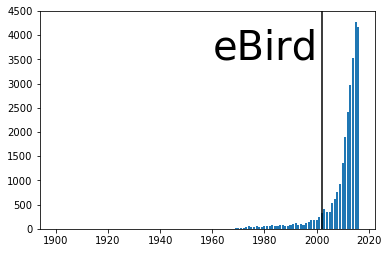

In [109]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(years, number_obs)
plt.axvline(x = 2002, color = "black")
plt.text(1960, 3500, "eBird",fontsize=40)
plt.show()

#this plot shows my data

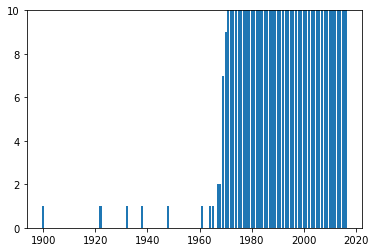

In [112]:
plt.bar(years, number_obs)
plt.ylim(0,10)
plt.show()

#plot illustrates why some data need to come out

The next step is to break this data down by date.  EBird is a well-curated database known as a citizen science data bonanza; however, data from historical records are also stored there.  Hence, building a habitat model based upon all data might be biased by these historical records.  Tricolored Blackbirds and Burrowing Owls have both declined significantly over the past century.  What's valuable to contemporary population genetic patterns would be habitat predictions based upon recent observations.  Hence, here I attempt to extract observations between provided years.

In [4]:
#extracting the data for the dates I seek

#some psuedocode
year1 = 1989
year2 = 2000
#my solution for the moment, creating a list of years between the requested ones
list_of_years = []
list_of_years.append(year1)
i = 0
while i < (year2 - year1):
    list_of_years.append(year1 + i)
    i = i + 1

Build loop that asks if value is in range of years
    if it is, store the key in a list
    return a list of numbers that = keys for the dictionaries

Build loop that goes through list of numbers
    store the lat/longs into a list
    return list of lat/longs

Plot lats and longs as x & y    


Here should be a map of my data points.  First naive, and then another map with the outline of CA and NA.  


Habitat models required a set of points for training the models and another for testing.  One good way to do that would be to pull out a subset of points.  There are on the order of 27K datapoints, so there's plenty to work with here.  Let's create psuedocode to randomly subsample that.

In [ ]:
initial list of lat/longs

for loop to grab values from dictionary
    each year grab values append to list

training_list = random subset of lat/long list
    do this as a for loop and erase as they're removed
test_list = the rest of the lat/long list

write a couple of files for running the model-testing program, MAXENT
        
            
